In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-RFA-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,Medu,studytime,failures,schoolsup,higher,Dalc,Walc,health,G3
0,1,1,4,2,0,1,1,1,1,3,6
1,1,1,1,2,0,0,1,1,1,3,6
2,1,1,1,2,0,1,1,2,3,3,6
3,1,1,4,3,0,0,1,1,1,5,7
4,1,1,3,2,0,0,1,1,2,5,7


In [3]:
df_por.shape

(649, 11)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.423656,10
1,6.814132,6
2,6.773568,9
3,6.480294,6
4,5.552420,6


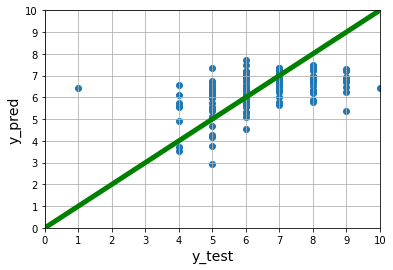

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

1.319461969640843

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,5.583333,10
1,6.800000,6
2,6.730769,9
3,5.600000,6
4,6.051282,6


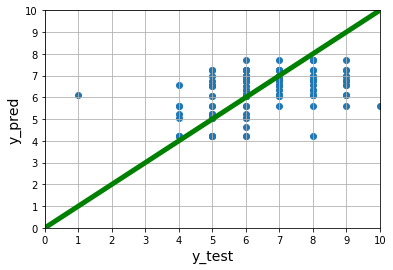

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [18]:
rmse(y_pred,y_test)

1.3763696093284603

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.374783,10
1,6.725702,6
2,6.905441,9
3,6.470507,6
4,6.270704,6


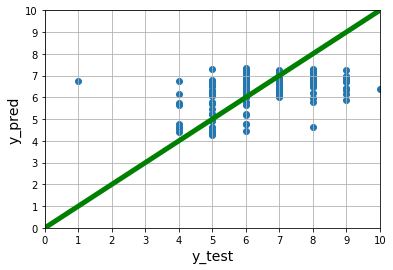

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [24]:
rmse(y_pred,y_test)

1.3432647809560427

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.535595,10
1,6.577069,6
2,6.660724,9
3,6.612460,6
4,5.763104,6


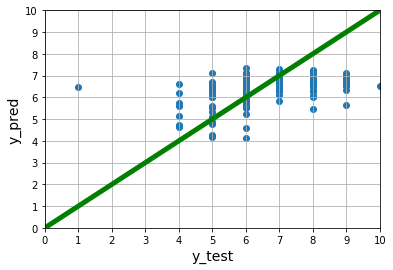

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [30]:
rmse(y_pred,y_test)

1.3110012137070333

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 10)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 64,epochs = 700)

Train on 519 samples, validate on 130 samples
Epoch 1/700
519/519 [==============================] - 1s 2ms/sample - loss: 41.1377 - val_loss: 43.5771
Epoch 2/700
519/519 [==============================] - 0s 66us/sample - loss: 40.5908 - val_loss: 43.1531
Epoch 3/700
519/519 [==============================] - 0s 67us/sample - loss: 40.1956 - val_loss: 42.7492
Epoch 4/700
519/519 [==============================] - 0s 64us/sample - loss: 39.7216 - val_loss: 42.3082
Epoch 5/700
519/519 [==============================] - 0s 60us/sample - loss: 39.2659 - val_loss: 41.7827
Epoch 6/700
519/519 [==============================] - 0s 71us/sample - loss: 38.6170 - val_loss: 41.1191
Epoch 7/700
519/519 [==============================] - 0s 67us/sample - loss: 37.8258 - val_loss: 40.2239
Epoch 8/700
519/519 [==============================] - 0s 62us/sample - loss: 37.0716 - val_loss: 38.9966
Epoch 9/700
519/519 [==============================] - 0s 66us/sample - loss: 35.7436 - val_loss: 37.2943
E

519/519 [==============================] - 0s 64us/sample - loss: 5.3103 - val_loss: 2.8387
Epoch 79/700
519/519 [==============================] - 0s 64us/sample - loss: 5.4794 - val_loss: 2.5620
Epoch 80/700
519/519 [==============================] - 0s 62us/sample - loss: 5.2009 - val_loss: 2.5790
Epoch 81/700
519/519 [==============================] - 0s 69us/sample - loss: 5.3842 - val_loss: 2.5948
Epoch 82/700
519/519 [==============================] - 0s 67us/sample - loss: 5.8358 - val_loss: 2.6222
Epoch 83/700
519/519 [==============================] - 0s 71us/sample - loss: 5.4118 - val_loss: 2.6285
Epoch 84/700
519/519 [==============================] - 0s 85us/sample - loss: 5.2502 - val_loss: 2.6862
Epoch 85/700
519/519 [==============================] - 0s 125us/sample - loss: 5.4328 - val_loss: 2.6547
Epoch 86/700
519/519 [==============================] - 0s 83us/sample - loss: 5.2317 - val_loss: 2.7012
Epoch 87/700
519/519 [==============================] - 0s 81us/sam

519/519 [==============================] - 0s 66us/sample - loss: 3.9168 - val_loss: 2.3528
Epoch 156/700
519/519 [==============================] - 0s 67us/sample - loss: 4.1623 - val_loss: 2.3063
Epoch 157/700
519/519 [==============================] - 0s 62us/sample - loss: 4.4758 - val_loss: 2.1950
Epoch 158/700
519/519 [==============================] - 0s 64us/sample - loss: 4.1289 - val_loss: 2.2007
Epoch 159/700
519/519 [==============================] - 0s 62us/sample - loss: 4.2825 - val_loss: 2.2758
Epoch 160/700
519/519 [==============================] - 0s 62us/sample - loss: 4.4282 - val_loss: 2.2860
Epoch 161/700
519/519 [==============================] - 0s 64us/sample - loss: 4.0189 - val_loss: 2.2751
Epoch 162/700
519/519 [==============================] - 0s 60us/sample - loss: 4.2595 - val_loss: 2.2683
Epoch 163/700
519/519 [==============================] - 0s 64us/sample - loss: 4.0265 - val_loss: 2.2561
Epoch 164/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 66us/sample - loss: 3.5963 - val_loss: 2.0513
Epoch 233/700
519/519 [==============================] - 0s 62us/sample - loss: 3.5711 - val_loss: 2.1218
Epoch 234/700
519/519 [==============================] - 0s 64us/sample - loss: 3.5500 - val_loss: 2.2432
Epoch 235/700
519/519 [==============================] - 0s 60us/sample - loss: 3.6274 - val_loss: 2.3334
Epoch 236/700
519/519 [==============================] - 0s 60us/sample - loss: 3.5519 - val_loss: 2.2893
Epoch 237/700
519/519 [==============================] - 0s 58us/sample - loss: 3.5805 - val_loss: 2.1343
Epoch 238/700
519/519 [==============================] - 0s 62us/sample - loss: 3.3997 - val_loss: 2.1465
Epoch 239/700
519/519 [==============================] - 0s 62us/sample - loss: 3.3164 - val_loss: 2.1402
Epoch 240/700
519/519 [==============================] - 0s 62us/sample - loss: 3.6480 - val_loss: 2.1537
Epoch 241/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 58us/sample - loss: 3.3372 - val_loss: 2.2255
Epoch 310/700
519/519 [==============================] - 0s 66us/sample - loss: 3.0881 - val_loss: 2.2207
Epoch 311/700
519/519 [==============================] - 0s 62us/sample - loss: 3.1913 - val_loss: 2.2521
Epoch 312/700
519/519 [==============================] - 0s 62us/sample - loss: 3.0050 - val_loss: 2.2173
Epoch 313/700
519/519 [==============================] - 0s 66us/sample - loss: 2.8272 - val_loss: 2.1278
Epoch 314/700
519/519 [==============================] - 0s 64us/sample - loss: 3.0134 - val_loss: 2.0434
Epoch 315/700
519/519 [==============================] - 0s 62us/sample - loss: 3.4127 - val_loss: 2.0043
Epoch 316/700
519/519 [==============================] - 0s 64us/sample - loss: 3.2181 - val_loss: 2.0218
Epoch 317/700
519/519 [==============================] - 0s 60us/sample - loss: 3.3886 - val_loss: 2.1002
Epoch 318/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 66us/sample - loss: 2.7546 - val_loss: 1.9733
Epoch 387/700
519/519 [==============================] - 0s 67us/sample - loss: 2.4623 - val_loss: 1.9743
Epoch 388/700
519/519 [==============================] - 0s 67us/sample - loss: 3.2346 - val_loss: 1.9763
Epoch 389/700
519/519 [==============================] - 0s 75us/sample - loss: 2.8511 - val_loss: 2.0304
Epoch 390/700
519/519 [==============================] - 0s 80us/sample - loss: 2.8436 - val_loss: 1.9687
Epoch 391/700
519/519 [==============================] - 0s 77us/sample - loss: 2.9469 - val_loss: 1.9758
Epoch 392/700
519/519 [==============================] - 0s 69us/sample - loss: 2.5561 - val_loss: 1.9893
Epoch 393/700
519/519 [==============================] - 0s 64us/sample - loss: 2.8333 - val_loss: 2.0603
Epoch 394/700
519/519 [==============================] - 0s 67us/sample - loss: 2.8636 - val_loss: 2.0524
Epoch 395/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 62us/sample - loss: 2.6899 - val_loss: 1.9872
Epoch 464/700
519/519 [==============================] - 0s 64us/sample - loss: 2.8426 - val_loss: 1.9509
Epoch 465/700
519/519 [==============================] - 0s 62us/sample - loss: 2.8120 - val_loss: 1.8865
Epoch 466/700
519/519 [==============================] - 0s 58us/sample - loss: 2.8400 - val_loss: 1.9013
Epoch 467/700
519/519 [==============================] - 0s 60us/sample - loss: 2.6100 - val_loss: 1.9941
Epoch 468/700
519/519 [==============================] - 0s 67us/sample - loss: 2.8316 - val_loss: 2.0326
Epoch 469/700
519/519 [==============================] - 0s 66us/sample - loss: 2.5671 - val_loss: 2.0057
Epoch 470/700
519/519 [==============================] - 0s 66us/sample - loss: 2.6478 - val_loss: 2.0102
Epoch 471/700
519/519 [==============================] - 0s 62us/sample - loss: 2.6807 - val_loss: 2.0154
Epoch 472/700
519/519 [==============================] - 0s 

Epoch 540/700
519/519 [==============================] - 0s 69us/sample - loss: 2.3615 - val_loss: 2.0138
Epoch 541/700
519/519 [==============================] - 0s 66us/sample - loss: 2.5403 - val_loss: 1.9946
Epoch 542/700
519/519 [==============================] - 0s 66us/sample - loss: 2.2218 - val_loss: 1.9726
Epoch 543/700
519/519 [==============================] - 0s 58us/sample - loss: 2.3484 - val_loss: 1.9737
Epoch 544/700
519/519 [==============================] - 0s 62us/sample - loss: 2.5862 - val_loss: 2.0030
Epoch 545/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2445 - val_loss: 2.0223
Epoch 546/700
519/519 [==============================] - 0s 67us/sample - loss: 2.4810 - val_loss: 2.0119
Epoch 547/700
519/519 [==============================] - 0s 62us/sample - loss: 2.2851 - val_loss: 1.9781
Epoch 548/700
519/519 [==============================] - 0s 64us/sample - loss: 2.2701 - val_loss: 1.9314
Epoch 549/700
519/519 [=======================

Epoch 617/700
519/519 [==============================] - 0s 66us/sample - loss: 2.0591 - val_loss: 1.9622
Epoch 618/700
519/519 [==============================] - 0s 62us/sample - loss: 2.1734 - val_loss: 1.9745
Epoch 619/700
519/519 [==============================] - 0s 67us/sample - loss: 2.2282 - val_loss: 1.9520
Epoch 620/700
519/519 [==============================] - 0s 58us/sample - loss: 2.3458 - val_loss: 1.9310
Epoch 621/700
519/519 [==============================] - 0s 66us/sample - loss: 2.1304 - val_loss: 1.9433
Epoch 622/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2124 - val_loss: 1.9122
Epoch 623/700
519/519 [==============================] - 0s 62us/sample - loss: 2.1447 - val_loss: 1.9107
Epoch 624/700
519/519 [==============================] - 0s 58us/sample - loss: 2.2265 - val_loss: 1.9498
Epoch 625/700
519/519 [==============================] - 0s 64us/sample - loss: 2.0186 - val_loss: 1.9740
Epoch 626/700
519/519 [=======================

519/519 [==============================] - 0s 64us/sample - loss: 2.1559 - val_loss: 1.9575
Epoch 695/700
519/519 [==============================] - 0s 62us/sample - loss: 2.1765 - val_loss: 1.9235
Epoch 696/700
519/519 [==============================] - 0s 62us/sample - loss: 2.2184 - val_loss: 1.9066
Epoch 697/700
519/519 [==============================] - 0s 64us/sample - loss: 2.1305 - val_loss: 1.9308
Epoch 698/700
519/519 [==============================] - 0s 66us/sample - loss: 2.1199 - val_loss: 1.9319
Epoch 699/700
519/519 [==============================] - 0s 60us/sample - loss: 2.2926 - val_loss: 1.9367
Epoch 700/700
519/519 [==============================] - 0s 62us/sample - loss: 2.0178 - val_loss: 1.9734


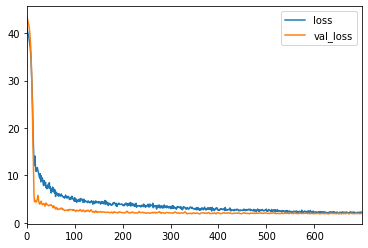

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,5.907866,10
1,6.253127,6
2,6.613337,9
3,5.991488,6
4,5.937866,6


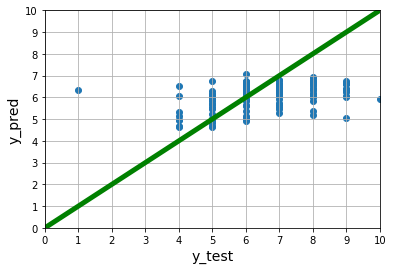

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [41]:
rmse(y_pred,y_test)

1.404778645771934

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 64,epochs = 700)

Train on 519 samples, validate on 259 samples
Epoch 1/700
519/519 [==============================] - 1s 1ms/sample - loss: 39.0959 - val_loss: 37.5518
Epoch 2/700
519/519 [==============================] - 0s 75us/sample - loss: 38.2817 - val_loss: 36.5489
Epoch 3/700
519/519 [==============================] - 0s 69us/sample - loss: 36.8505 - val_loss: 35.2424
Epoch 4/700
519/519 [==============================] - 0s 71us/sample - loss: 35.2890 - val_loss: 33.6158
Epoch 5/700
519/519 [==============================] - 0s 67us/sample - loss: 33.6789 - val_loss: 31.5950
Epoch 6/700
519/519 [==============================] - 0s 67us/sample - loss: 31.3381 - val_loss: 29.1641
Epoch 7/700
519/519 [==============================] - 0s 67us/sample - loss: 28.6507 - val_loss: 26.2308
Epoch 8/700
519/519 [==============================] - 0s 68us/sample - loss: 25.7785 - val_loss: 22.7809
Epoch 9/700
519/519 [==============================] - 0s 69us/sample - loss: 22.9397 - val_loss: 18.9810
E

519/519 [==============================] - 0s 75us/sample - loss: 5.1064 - val_loss: 2.1978
Epoch 79/700
519/519 [==============================] - 0s 73us/sample - loss: 4.5069 - val_loss: 2.1325
Epoch 80/700
519/519 [==============================] - 0s 73us/sample - loss: 4.4463 - val_loss: 2.0579
Epoch 81/700
519/519 [==============================] - 0s 71us/sample - loss: 4.2516 - val_loss: 2.0403
Epoch 82/700
519/519 [==============================] - 0s 67us/sample - loss: 4.6574 - val_loss: 2.0314
Epoch 83/700
519/519 [==============================] - 0s 60us/sample - loss: 4.0087 - val_loss: 1.9965
Epoch 84/700
519/519 [==============================] - 0s 66us/sample - loss: 4.6285 - val_loss: 1.9631
Epoch 85/700
519/519 [==============================] - 0s 66us/sample - loss: 4.6096 - val_loss: 1.9972
Epoch 86/700
519/519 [==============================] - 0s 73us/sample - loss: 4.4309 - val_loss: 2.0476
Epoch 87/700
519/519 [==============================] - 0s 69us/samp

519/519 [==============================] - 0s 67us/sample - loss: 3.9140 - val_loss: 1.8107
Epoch 156/700
519/519 [==============================] - 0s 64us/sample - loss: 3.8358 - val_loss: 1.8540
Epoch 157/700
519/519 [==============================] - 0s 67us/sample - loss: 3.9430 - val_loss: 1.8489
Epoch 158/700
519/519 [==============================] - 0s 69us/sample - loss: 3.4736 - val_loss: 1.7490
Epoch 159/700
519/519 [==============================] - 0s 67us/sample - loss: 3.6149 - val_loss: 1.7078
Epoch 160/700
519/519 [==============================] - 0s 67us/sample - loss: 3.8178 - val_loss: 1.7109
Epoch 161/700
519/519 [==============================] - 0s 62us/sample - loss: 3.4183 - val_loss: 1.7717
Epoch 162/700
519/519 [==============================] - 0s 73us/sample - loss: 3.9930 - val_loss: 1.7879
Epoch 163/700
519/519 [==============================] - 0s 66us/sample - loss: 3.5689 - val_loss: 1.7877
Epoch 164/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 69us/sample - loss: 3.0793 - val_loss: 1.5884
Epoch 233/700
519/519 [==============================] - 0s 71us/sample - loss: 3.3835 - val_loss: 1.6079
Epoch 234/700
519/519 [==============================] - 0s 73us/sample - loss: 3.4307 - val_loss: 1.6135
Epoch 235/700
519/519 [==============================] - 0s 71us/sample - loss: 3.4269 - val_loss: 1.6393
Epoch 236/700
519/519 [==============================] - 0s 77us/sample - loss: 3.0826 - val_loss: 1.6103
Epoch 237/700
519/519 [==============================] - 0s 67us/sample - loss: 3.0806 - val_loss: 1.6109
Epoch 238/700
519/519 [==============================] - 0s 81us/sample - loss: 3.1806 - val_loss: 1.6245
Epoch 239/700
519/519 [==============================] - 0s 77us/sample - loss: 3.5785 - val_loss: 1.6205
Epoch 240/700
519/519 [==============================] - 0s 75us/sample - loss: 3.2746 - val_loss: 1.5679
Epoch 241/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 73us/sample - loss: 2.8954 - val_loss: 1.6062
Epoch 310/700
519/519 [==============================] - 0s 79us/sample - loss: 3.0195 - val_loss: 1.6099
Epoch 311/700
519/519 [==============================] - 0s 69us/sample - loss: 3.0246 - val_loss: 1.5641
Epoch 312/700
519/519 [==============================] - 0s 67us/sample - loss: 2.7606 - val_loss: 1.4757
Epoch 313/700
519/519 [==============================] - 0s 67us/sample - loss: 2.9608 - val_loss: 1.4326
Epoch 314/700
519/519 [==============================] - 0s 69us/sample - loss: 2.9915 - val_loss: 1.4095
Epoch 315/700
519/519 [==============================] - 0s 69us/sample - loss: 2.8380 - val_loss: 1.4154
Epoch 316/700
519/519 [==============================] - 0s 64us/sample - loss: 2.7274 - val_loss: 1.4366
Epoch 317/700
519/519 [==============================] - 0s 69us/sample - loss: 3.1097 - val_loss: 1.4658
Epoch 318/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 69us/sample - loss: 2.7799 - val_loss: 1.4068
Epoch 387/700
519/519 [==============================] - 0s 73us/sample - loss: 2.6553 - val_loss: 1.3908
Epoch 388/700
519/519 [==============================] - 0s 69us/sample - loss: 2.8112 - val_loss: 1.3749
Epoch 389/700
519/519 [==============================] - 0s 67us/sample - loss: 2.3624 - val_loss: 1.3813
Epoch 390/700
519/519 [==============================] - 0s 67us/sample - loss: 2.7615 - val_loss: 1.3859
Epoch 391/700
519/519 [==============================] - 0s 67us/sample - loss: 2.6223 - val_loss: 1.3864
Epoch 392/700
519/519 [==============================] - 0s 67us/sample - loss: 2.5976 - val_loss: 1.3885
Epoch 393/700
519/519 [==============================] - 0s 64us/sample - loss: 2.5695 - val_loss: 1.4267
Epoch 394/700
519/519 [==============================] - 0s 67us/sample - loss: 2.6408 - val_loss: 1.4709
Epoch 395/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 79us/sample - loss: 2.4824 - val_loss: 1.3685
Epoch 464/700
519/519 [==============================] - 0s 73us/sample - loss: 2.2163 - val_loss: 1.3825
Epoch 465/700
519/519 [==============================] - 0s 77us/sample - loss: 2.4423 - val_loss: 1.3852
Epoch 466/700
519/519 [==============================] - 0s 77us/sample - loss: 2.4890 - val_loss: 1.4526
Epoch 467/700
519/519 [==============================] - 0s 73us/sample - loss: 2.3532 - val_loss: 1.4275
Epoch 468/700
519/519 [==============================] - 0s 71us/sample - loss: 2.5856 - val_loss: 1.4081
Epoch 469/700
519/519 [==============================] - 0s 73us/sample - loss: 2.4918 - val_loss: 1.4050
Epoch 470/700
519/519 [==============================] - 0s 67us/sample - loss: 2.4992 - val_loss: 1.3976
Epoch 471/700
519/519 [==============================] - 0s 71us/sample - loss: 2.4976 - val_loss: 1.3829
Epoch 472/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 67us/sample - loss: 2.1498 - val_loss: 1.3685
Epoch 541/700
519/519 [==============================] - 0s 66us/sample - loss: 2.5541 - val_loss: 1.3579
Epoch 542/700
519/519 [==============================] - 0s 71us/sample - loss: 2.3957 - val_loss: 1.3573
Epoch 543/700
519/519 [==============================] - 0s 69us/sample - loss: 2.3600 - val_loss: 1.3596
Epoch 544/700
519/519 [==============================] - 0s 67us/sample - loss: 2.0038 - val_loss: 1.3789
Epoch 545/700
519/519 [==============================] - 0s 66us/sample - loss: 2.3256 - val_loss: 1.3494
Epoch 546/700
519/519 [==============================] - 0s 66us/sample - loss: 2.3372 - val_loss: 1.3380
Epoch 547/700
519/519 [==============================] - 0s 69us/sample - loss: 1.9728 - val_loss: 1.3495
Epoch 548/700
519/519 [==============================] - 0s 71us/sample - loss: 2.2085 - val_loss: 1.4088
Epoch 549/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 71us/sample - loss: 2.2083 - val_loss: 1.3612
Epoch 618/700
519/519 [==============================] - 0s 58us/sample - loss: 2.2670 - val_loss: 1.3930
Epoch 619/700
519/519 [==============================] - 0s 90us/sample - loss: 2.2736 - val_loss: 1.4180
Epoch 620/700
519/519 [==============================] - 0s 71us/sample - loss: 2.0538 - val_loss: 1.3606
Epoch 621/700
519/519 [==============================] - 0s 77us/sample - loss: 2.2995 - val_loss: 1.3256
Epoch 622/700
519/519 [==============================] - 0s 64us/sample - loss: 2.4705 - val_loss: 1.3394
Epoch 623/700
519/519 [==============================] - 0s 69us/sample - loss: 2.0177 - val_loss: 1.3877
Epoch 624/700
519/519 [==============================] - 0s 69us/sample - loss: 2.1853 - val_loss: 1.3695
Epoch 625/700
519/519 [==============================] - 0s 64us/sample - loss: 2.1329 - val_loss: 1.3324
Epoch 626/700
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 73us/sample - loss: 2.1208 - val_loss: 1.3213
Epoch 695/700
519/519 [==============================] - 0s 81us/sample - loss: 2.0069 - val_loss: 1.3268
Epoch 696/700
519/519 [==============================] - 0s 79us/sample - loss: 1.9987 - val_loss: 1.3245
Epoch 697/700
519/519 [==============================] - 0s 75us/sample - loss: 2.0265 - val_loss: 1.3584
Epoch 698/700
519/519 [==============================] - 0s 77us/sample - loss: 2.1253 - val_loss: 1.3716
Epoch 699/700
519/519 [==============================] - 0s 83us/sample - loss: 2.2632 - val_loss: 1.3312
Epoch 700/700
519/519 [==============================] - 0s 75us/sample - loss: 1.9653 - val_loss: 1.3028


In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,4.086957,4.510000,4.892494,5.000906
1,7.000000,6.295000,6.191535,6.100786
2,4.086957,4.310000,4.984675,4.615758
3,6.413793,7.070000,6.929428,6.748710
4,6.689655,6.156143,6.953104,6.885713


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,7.500000,6.662500,6.622063,6.190250
1,5.793103,6.400000,6.591311,6.480506
2,7.500000,7.076667,6.622063,6.626575
3,7.500000,6.632500,6.622063,6.183207
4,5.793103,5.650000,5.441002,6.121600


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,6.419674,10
1,6.930861,6
2,7.035625,9
3,6.414505,6
4,6.603624,6


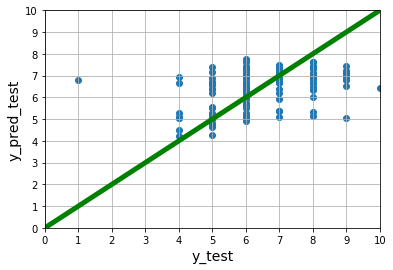

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [53]:
rmse(y_pred_test,y_test)

1.3508331974960863

In [54]:
mean_absolute_error(y_pred_test,y_test)

1.0141035907165967